# Analyze results of causal SNPs predicted by models

In [103]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns

In [104]:
err_SNPs_idx = [3082, 8246, 8449, 9509]

In [105]:
# SVM results
s_data = pd.read_csv("/data/results/svm_10000.csv")
s_data = s_data.drop([s_data.index[3082] , s_data.index[8246], s_data.index[8449] , s_data.index[9509]])
print(s_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9996 entries, 0 to 9999
Data columns (total 17 columns):
Unnamed: 0              9996 non-null int64
SNP                     9996 non-null object
chr_pos_hg38            9996 non-null object
reference_allele        9996 non-null object
other_allele            9996 non-null object
ref_allele_frequency    9996 non-null float64
pvalue                  9996 non-null float64
het_pvalue              9996 non-null float64
log_odds                9996 non-null float64
log_odds_se             9996 non-null float64
N_case                  9996 non-null int64
N_control               9996 non-null int64
model                   9996 non-null object
chr_pos_(b36)           9996 non-null object
sum_diff                9996 non-null float64
max_diff                9996 non-null float64
max_log_fold            9996 non-null float64
dtypes: float64(8), int64(3), object(6)
memory usage: 1.4+ MB
None


In [106]:
s_snps = np.array(s_data["SNP"].values.tolist())
s_diff = np.array(s_data["max_diff"].values.tolist())

In [107]:
# Basenji results
b_data = pd.read_csv("/data/basenji_snp_10000.csv")
# b_data = b_data.drop([b_data.index[3082] , b_data.index[8246], b_data.index[8449] , b_data.index[9509]])
b_data_values = b_data.values.tolist()
print(b_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
snp	pos	ref	max_diff	sum_diff	max_log_fold_change	sum_log_fold_change    10000 non-null object
dtypes: object(1)
memory usage: 78.2+ KB
None


In [108]:
b_snps = list()
b_diff = list()
for b in b_data_values:
    contents = b[0].split('\t')
    b_snps.append(contents[0])
    b_diff.append(float(contents[3]))
b_snps = np.array(b_snps)
b_diff = np.array(b_diff)

In [109]:
# our model's results
m_data = pd.read_csv("/data/our_model_max_predicted_change.csv")
m_data = m_data.drop([m_data.index[3082] , m_data.index[8246], m_data.index[8449] , m_data.index[9509]])
print(m_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9996 entries, 0 to 9999
Data columns (total 15 columns):
Unnamed: 0              9996 non-null int64
SNP                     9996 non-null object
chr_pos_hg38            9996 non-null object
reference_allele        9996 non-null object
other_allele            9996 non-null object
ref_allele_frequency    9996 non-null float64
pvalue                  9996 non-null float64
het_pvalue              9996 non-null float64
log_odds                9996 non-null float64
log_odds_se             9996 non-null float64
N_case                  9996 non-null int64
N_control               9996 non-null int64
model                   9996 non-null object
chr_pos_(b36)           9996 non-null object
max_change              9996 non-null float64
dtypes: float64(6), int64(3), object(6)
memory usage: 1.2+ MB
None


In [110]:
m_snps = np.array(m_data["SNP"].values.tolist())
m_diff = np.array(m_data["max_change"].values.tolist())

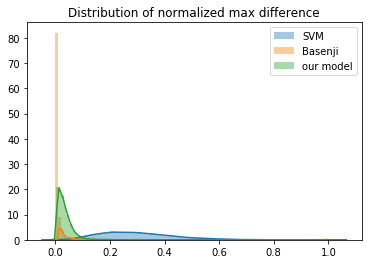

In [111]:
# plot distribution together
plt.figure()
sns.distplot(s_diff/np.max(np.abs(s_diff)), hist=True, kde=True, 
             bins=100, label="SVM")
sns.distplot(b_diff/np.max(np.abs(b_diff)), hist=True, kde=True, 
             bins=100, label="Basenji")
sns.distplot(m_diff/np.max(np.abs(m_diff)), hist=True, kde=True, 
             bins=100, label="our model")
plt.title("Distribution of normalized max difference")
plt.legend()
plt.show()

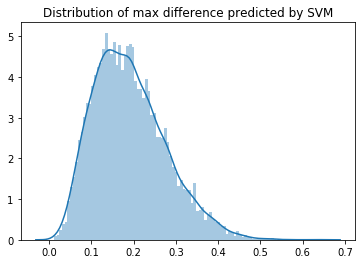

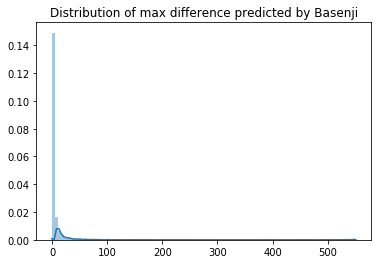

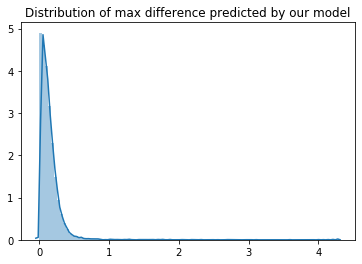

In [112]:
# plot each distribution
plt.figure()
sns.distplot(s_diff, hist=True, kde=True, 
             bins=100)
plt.title("Distribution of max difference predicted by SVM")
plt.show()
plt.figure()
sns.distplot(b_diff, hist=True, kde=True, 
             bins=100)
plt.title("Distribution of max difference predicted by Basenji")
plt.show()
plt.figure()
sns.distplot(m_diff, hist=True, kde=True, 
             bins=100)
plt.title("Distribution of max difference predicted by our model")
plt.show()

In [209]:
# top SNPs 
n = 50
s_n = n
b_n = 1000
m_n = 500

# of SVM
s_sort_idx = np.argsort(-s_diff)
s_top = s_snps[s_sort_idx[0:s_n]]

# of Basenji
b_sort_idx = np.argsort(-b_diff)
b_top = b_snps[b_sort_idx[0:b_n]]

# of our model
m_sort_idx = np.argsort(-m_diff)
m_top = m_snps[m_sort_idx[0:m_n]]

# print("Top "+str(n)+" SNPs by SVM")
# print(list(s_top))
# print("Top "+str(n)+" SNPs by Basenji")
# print(list(b_top))
# print("Top "+str(n)+" SNPs by our model")
# print(list(m_top))

In [210]:
s_m_common = list(set(s_top).intersection(m_top))

print("Common in Top "+str(s_n)+" by SVM and Top "+str(m_n)+" by Our Model")
print("Counts:", len(s_m_common))
# print(s_m_common)


Common in Top 50 by SVM and Top 500 by Our Model
Counts: 8


In [211]:
s_b_common = list(set(s_top).intersection(b_top))

print("Common in Top "+str(s_n)+" by SVM and Top "+str(b_n)+" by Basenji")
print("Counts:", len(s_b_common))
# print(s_b_common)


Common in Top 50 by SVM and Top 1000 by Basenji
Counts: 4


In [212]:
b_m_common = list(set(b_top).intersection(m_top))

print("Common in Top "+str(b_n)+" by Basenji and Top "+str(m_n)+" by Our Model")
print("Counts:", len(b_m_common))
# print(b_m_common)


Common in Top 1000 by Basenji and Top 500 by Our Model
Counts: 125


In [90]:
# common in all three
s_b_m_common = list(set(b_m_common).intersection(s_top))

print("Common in all three models")
print("Counts:", len(s_b_m_common))
print(s_b_m_common)

Common in Top 500 by all three models
Counts: 6
['rs1746048', 'rs251022', 'rs2228576', 'rs3127168', 'rs9858057', 'rs9978407']


In [91]:
print("Common in Top "+str(n)+" by Basenji and Our Model")
common_b_rank = list()
common_m_rank = list()
for snp in b_m_common:
    b_idx = np.where(b_snps==snp)[0]
    m_idx = np.where(m_snps==snp)[0][0]
    m_r = np.where(m_sort_idx==m_idx)[0][0]
    common_m_rank.append(m_r)
    common_b_rank.append(np.where(b_sort_idx==b_idx[0])[0][0])
    for i in b_idx:
        b_r = np.where(b_sort_idx==i)[0][0]
#         print("SNP: %10s, our rank:%3d, Basenji rank:%3d" %(snp, m_r, b_r))
    
   

Common in Top 500 by Basenji and Our Model


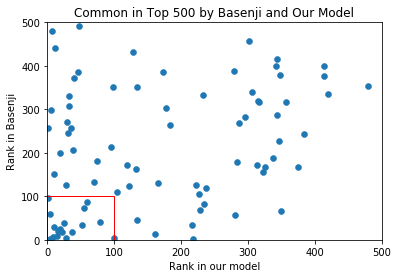

In [94]:
# plot commons
plt.figure()
plt.scatter(common_m_rank,common_b_rank,linewidths=0.5)
plt.xlabel("Rank in our model")
plt.ylabel("Rank in Basenji")
plt.title("Common in Top "+str(n)+" by Basenji and Our Model")
plt.xlim([0,n])
plt.ylim([0,n])
ax = plt.gca()
ax.add_patch(
    patches.Rectangle(
        xy=(0, 0),  # point of origin.
        width=100,
        height=100,
        linewidth=1,
        color='red',
        fill=False
    )
)
plt.show()

In [75]:
print("Top "+str(n)+" by Our Model")
for s in m_top:
    if s in b_top:
        print("%10s (common)" % s)
    else:
        print("%10s" % s)   

Top 25 by Our Model
 rs9859153 (common)
 rs2301166
 rs2001884
 rs1350271
rs10430050
rs10488763 (common)
 rs9466319
rs11253042
 rs4286642
 rs2126202 (common)
 rs7071474
  rs786792
rs12323935
 rs6905958
 rs2185946
 rs7900536 (common)
 rs2489957
rs12410318 (common)
 rs6064357
 rs6538588
 rs2232965
 rs3903279
 rs1746048 (common)
  rs162376
 rs2562519


In [39]:
# SNP detail
import glob
m_dir = '/data/forward_only_expanded_conv_output_top_10000/'

In [101]:
snp = 'rs10430050' # name of the SNP interested

alt_file = glob.glob(m_dir+snp+"_*_alt.npy")
ref_file = glob.glob(m_dir+snp+"_*_reference.npy")
alt_pred = np.load(alt_file[0])
ref_pred = np.load(ref_file[0])

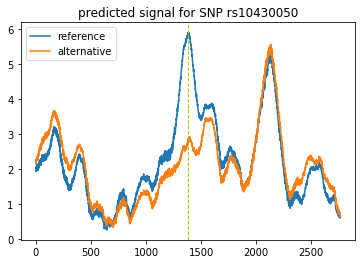

In [102]:
# plot the predicted profile for reference and alternative SNP
plt.figure()
plt.plot(ref_pred, label="reference")
plt.plot(alt_pred, label="alternative")
plt.axvline(x=len(ref_pred)/2, linestyle='--', c='y', linewidth=1)
plt.title("predicted signal for SNP "+snp)
plt.legend()
plt.show()